In [ ]:
import kagglehub

path = kagglehub.dataset_download("frtgnn/dunnhumby-the-complete-journey")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/frtgnn/dunnhumby-the-complete-journey/versions/1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
import pandas as pd
path = "/root/.cache/kagglehub/datasets/frtgnn/dunnhumby-the-complete-journey/versions/1"

files = os.listdir(path)

dataframes = {}

for file in files:
    if file.endswith('.csv'):
        file_path = os.path.join(path, file)
        df_name = file.replace('.csv', '')
        dataframes[df_name] = pd.read_csv(file_path)
        print(f"Loaded {file} into DataFrame '{df_name}'")
        print(dataframes[df_name].head())

Loaded hh_demographic.csv into DataFrame 'hh_demographic'
  AGE_DESC MARITAL_STATUS_CODE INCOME_DESC HOMEOWNER_DESC      HH_COMP_DESC  \
0      65+                   A      35-49K      Homeowner  2 Adults No Kids   
1    45-54                   A      50-74K      Homeowner  2 Adults No Kids   
2    25-34                   U      25-34K        Unknown     2 Adults Kids   
3    25-34                   U      75-99K      Homeowner     2 Adults Kids   
4    45-54                   B      50-74K      Homeowner     Single Female   

  HOUSEHOLD_SIZE_DESC KID_CATEGORY_DESC  household_key  
0                   2      None/Unknown              1  
1                   2      None/Unknown              7  
2                   3                 1              8  
3                   4                 2             13  
4                   1      None/Unknown             16  
Loaded coupon.csv into DataFrame 'coupon'
    COUPON_UPC  PRODUCT_ID  CAMPAIGN
0  10000089061       27160         4
1  100000

In [ ]:
transaction = dataframes['transaction_data']
transaction.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [ ]:
product = dataframes['product']
product.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


DATA PREPROCESSING

In [ ]:
transaction.drop(columns=['RETAIL_DISC','TRANS_TIME','WEEK_NO','COUPON_DISC','COUPON_MATCH_DISC','DAY','SALES_VALUE','STORE_ID'],axis=1,inplace=True)

In [ ]:
#check transaction
transaction

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY
0,2375,26984851472,1004906,1
1,2375,26984851472,1033142,1
2,2375,26984851472,1036325,1
3,2375,26984851472,1082185,1
4,2375,26984851472,8160430,1
...,...,...,...,...
2595727,1598,42305362535,92130,1
2595728,1598,42305362535,114102,1
2595729,1598,42305362535,133449,1
2595730,1598,42305362535,6923644,1


In [ ]:
product.drop(columns=['MANUFACTURER','DEPARTMENT','BRAND','CURR_SIZE_OF_PRODUCT'], axis=1, inplace=True)

In [ ]:
product

,PRODUCT_ID,COMMODITY_DESC,SUB_COMMODITY_DESC
0,25671,FRZN ICE,ICE - CRUSHED/CUBED
1,26081,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION
2,26093,BREAD,BREAD:ITALIAN/FRENCH
3,26190,FRUIT - SHELF STABLE,APPLE SAUCE
4,26355,COOKIES/CONES,SPECIALTY COOKIES
...,...,...,...
92348,18293142,BOOKSTORE,PAPERBACK BOOKS
92349,18293439,BOOKSTORE,CHILDRENS LOW END
92350,18293696,BOOKSTORE,PAPERBACK BEST SELLER
92351,18294080,BOOKSTORE,PAPERBACK BOOKS


In [ ]:
product['SUB_COMMODITY_DESC'].nunique()

2383

In [ ]:
product['SUB_COMMODITY_DESC'].value_counts()

,count
SUB_COMMODITY_DESC,
CARDS EVERYDAY,1005
BEERALEMALT LIQUORS,833
SPICES & SEASONINGS,629
GIFT-WRAP EVERYDAY,547
POTATO CHIPS,531
...,...
NON FOOD,1
MEAT: CHICKEN PPK/PRESLC,1
SEAFOOD-FRZ-GRILLED PORTIONS,1


In [ ]:
product['PRODUCT_ID'].nunique()

92353

In [ ]:
transaction['PRODUCT_ID'].nunique()

92339

In [ ]:
transaction.isnull().sum()

,0
household_key,0
BASKET_ID,0
PRODUCT_ID,0
QUANTITY,0


In [ ]:
product.isnull().sum()

,0
PRODUCT_ID,0
COMMODITY_DESC,0
SUB_COMMODITY_DESC,0


In [ ]:
product['PRODUCT_ID'].duplicated().sum()

0

In [ ]:
import numpy as np
nan_indices = np.isnan(transaction)
print(nan_indices)

         household_key  BASKET_ID  PRODUCT_ID  QUANTITY
0                False      False       False     False
1                False      False       False     False
2                False      False       False     False
3                False      False       False     False
4                False      False       False     False
...                ...        ...         ...       ...
2595727          False      False       False     False
2595728          False      False       False     False
2595729          False      False       False     False
2595730          False      False       False     False
2595731          False      False       False     False

[2595732 rows x 4 columns]


In [ ]:
import numpy as np
nan_indices = product.isna()
print(nan_indices)

       PRODUCT_ID  COMMODITY_DESC  SUB_COMMODITY_DESC
0           False           False               False
1           False           False               False
2           False           False               False
3           False           False               False
4           False           False               False
...           ...             ...                 ...
92348       False           False               False
92349       False           False               False
92350       False           False               False
92351       False           False               False
92352       False           False               False

[92353 rows x 3 columns]


In [ ]:
transaction.dtypes

,0
household_key,int64
BASKET_ID,int64
PRODUCT_ID,int64
QUANTITY,int64


In [ ]:
product.dtypes

,0
PRODUCT_ID,int64
COMMODITY_DESC,object
SUB_COMMODITY_DESC,object


In [ ]:
transaction.duplicated().sum()

0

In [ ]:
product.duplicated().sum()

0

In [ ]:
transaction = transaction.merge(product, on='PRODUCT_ID', how='left')
transaction

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,COMMODITY_DESC,SUB_COMMODITY_DESC
0,2375,26984851472,1004906,1,POTATOES,POTATOES RUSSET (BULK&BAG)
1,2375,26984851472,1033142,1,ONIONS,ONIONS SWEET (BULK&BAG)
2,2375,26984851472,1036325,1,VEGETABLES - ALL OTHERS,CELERY
3,2375,26984851472,1082185,1,TROPICAL FRUIT,BANANAS
4,2375,26984851472,8160430,1,ORGANICS FRUIT & VEGETABLES,ORGANIC CARROTS
...,...,...,...,...,...,...
2595727,1598,42305362535,92130,1,MARGARINES,MARGARINE: TUBS AND BOWLS
2595728,1598,42305362535,114102,1,BEERS/ALES,BEERALEMALT LIQUORS
2595729,1598,42305362535,133449,1,BEERS/ALES,BEERALEMALT LIQUORS
2595730,1598,42305362535,6923644,1,BEERS/ALES,BEERALEMALT LIQUORS


In [ ]:
transaction.isnull().sum()

,0
household_key,0
BASKET_ID,0
PRODUCT_ID,0
QUANTITY,0
COMMODITY_DESC,0
SUB_COMMODITY_DESC,0


In [ ]:
transaction.isna().sum()

,0
household_key,0
BASKET_ID,0
PRODUCT_ID,0
QUANTITY,0
COMMODITY_DESC,0
SUB_COMMODITY_DESC,0


In [ ]:
transaction.duplicated().sum()

0

In [ ]:
transaction['SUB_COMMODITY_DESC'].value_counts()

,count
SUB_COMMODITY_DESC,
FLUID MILK WHITE ONLY,65764
SOFT DRINKS 12/18&15PK CAN CAR,39352
YOGURT NOT MULTI-PACKS,37440
SFT DRNK 2 LITER BTL CARB INCL,37273
BANANAS,30436
...,...
BATH CANDLES,1
BOURBONWHISKEYSOUR MASHES(OV,1
COOKIES: LESS THAN 6,1


In [ ]:
transaction['COMMODITY_DESC'].value_counts()

,count
COMMODITY_DESC,
SOFT DRINKS,117532
FLUID MILK PRODUCTS,85630
BAKED BREAD/BUNS/ROLLS,83232
CHEESE,74885
BAG SNACKS,67190
...,...
NDAIRY/TEAS/JUICE/SOD,2
MISCELLANEOUS(CORP USE ONLY),1
EASTER LILY,1


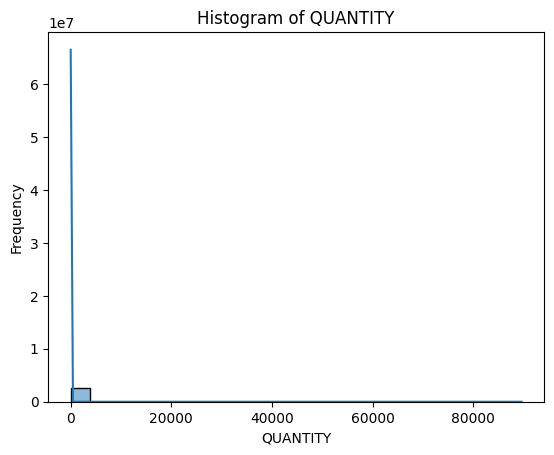

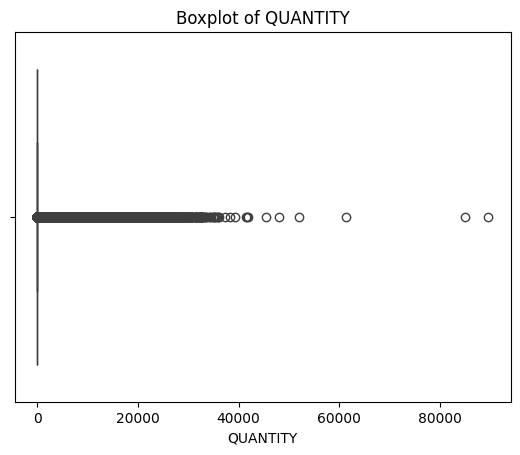

In [ ]:
sns.histplot(transaction['QUANTITY'], kde=True)
plt.title("Histogram of QUANTITY")
plt.xlabel("QUANTITY")
plt.ylabel("Frequency")
plt.show()

sns.boxplot(x=transaction['QUANTITY'])
plt.title("Boxplot of QUANTITY")
plt.show()

Dữ liệu ko phân phối chuẩn, lệch mạnh vì vậy phương pháp z-score ko phù hợp trong trường hợp này => thay vào đó detect outliers bằng IQR

In [ ]:
Q1 = transaction['QUANTITY'].quantile(0.25)
Q3 = transaction['QUANTITY'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = transaction[(transaction['QUANTITY'] < lower_bound) | (transaction['QUANTITY'] > upper_bound)]
print(outliers)

         household_key    BASKET_ID  PRODUCT_ID  QUANTITY  \
5                 2375  26984851516      826249         2   
16                1130  26984905972      833715         2   
17                1130  26984905972      866950         2   
18                1130  26984905972     1022843         2   
20                1130  26984905972     1071333         2   
...                ...          ...         ...       ...   
2595651           2125  42291245957     1977026         2   
2595666           2125  42291245957     6607550         2   
2595685           1037  42291971719       72816         2   
2595704           1369  42302712189      959737         2   
2595720           1598  42305362497      114397         2   

                 COMMODITY_DESC            SUB_COMMODITY_DESC  
5        BAKED BREAD/BUNS/ROLLS                HAMBURGER BUNS  
16                         SOUP      RAMEN NOODLES/RAMEN CUPS  
17                         SOUP      RAMEN NOODLES/RAMEN CUPS  
18         

In [ ]:
transaction['QUANTITY'].describe()

,QUANTITY
count,2.595732e+06
mean,1.004286e+02
std,1.153436e+03
min,0.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,8.963800e+04


In [ ]:
upper_threshold = transaction["QUANTITY"].quantile(0.99)
transaction_cleaned = transaction[transaction["QUANTITY"] <= upper_threshold]
transaction_cleaned

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,COMMODITY_DESC,SUB_COMMODITY_DESC
0,2375,26984851472,1004906,1,POTATOES,POTATOES RUSSET (BULK&BAG)
1,2375,26984851472,1033142,1,ONIONS,ONIONS SWEET (BULK&BAG)
2,2375,26984851472,1036325,1,VEGETABLES - ALL OTHERS,CELERY
3,2375,26984851472,1082185,1,TROPICAL FRUIT,BANANAS
4,2375,26984851472,8160430,1,ORGANICS FRUIT & VEGETABLES,ORGANIC CARROTS
...,...,...,...,...,...,...
2595727,1598,42305362535,92130,1,MARGARINES,MARGARINE: TUBS AND BOWLS
2595728,1598,42305362535,114102,1,BEERS/ALES,BEERALEMALT LIQUORS
2595729,1598,42305362535,133449,1,BEERS/ALES,BEERALEMALT LIQUORS
2595730,1598,42305362535,6923644,1,BEERS/ALES,BEERALEMALT LIQUORS


In [ ]:
transaction_cleaned['QUANTITY'].value_counts()

,count
QUANTITY,
1,2050967
2,372373
3,66962
4,38667
0,14466
5,10918
6,8981
8,2531
10,2219


In [ ]:
transaction_cleaned = transaction_cleaned[transaction_cleaned['QUANTITY'] > 0]

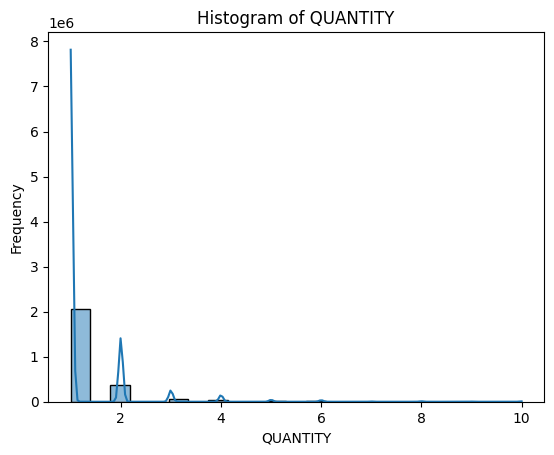

In [ ]:
sns.histplot(transaction_cleaned['QUANTITY'], kde=True)
plt.title("Histogram of QUANTITY")
plt.xlabel("QUANTITY")
plt.ylabel("Frequency")
plt.show()

In [ ]:
transaction_cleaned.drop(columns=['COMMODITY_DESC'], axis=1, inplace=True)

In [ ]:
transaction_cleaned

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SUB_COMMODITY_DESC
0,2375,26984851472,1004906,1,POTATOES RUSSET (BULK&BAG)
1,2375,26984851472,1033142,1,ONIONS SWEET (BULK&BAG)
2,2375,26984851472,1036325,1,CELERY
3,2375,26984851472,1082185,1,BANANAS
4,2375,26984851472,8160430,1,ORGANIC CARROTS
...,...,...,...,...,...
2595727,1598,42305362535,92130,1,MARGARINE: TUBS AND BOWLS
2595728,1598,42305362535,114102,1,BEERALEMALT LIQUORS
2595729,1598,42305362535,133449,1,BEERALEMALT LIQUORS
2595730,1598,42305362535,6923644,1,BEERALEMALT LIQUORS


In [ ]:
user_product_matrix = transaction_cleaned.pivot_table(index='household_key', columns='PRODUCT_ID', values='QUANTITY', aggfunc='sum', fill_value=0)
print(user_product_matrix.head())

PRODUCT_ID     25671     26081     26093     26190     26355     26426     \
household_key                                                               
1                     0         0         0         0         0         0   
2                     0         0         0         0         0         0   
3                     0         0         0         0         0         0   
4                     0         0         0         0         0         0   
5                     0         0         0         0         0         0   

PRODUCT_ID     26540     26601     26636     26691     ...  18273019  \
household_key                                          ...             
1                     0         0         0         0  ...         0   
2                     0         0         0         0  ...         0   
3                     0         0         0         0  ...         0   
4                     0         0         0         0  ...         0   
5                     0     

In [ ]:
user_product_matrix.shape

(2500, 91969)

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
Recommendation = np.array(user_product_matrix)
Recommendation_train, Recommendation_test = train_test_split(Recommendation, test_size=0.2, random_state=42)

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
svd.fit(Recommendation_train)

TruncatedSVD()

In [ ]:
Recommendation_train_reconstructed = np.dot(svd.transform(Recommendation_train), svd.components_)


In [ ]:
predicted_quantity = np.dot(svd.transform(Recommendation_test), svd.components_)

In [ ]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(Recommendation_test, predicted_quantity)
print(f"MSE on test data: {mse}")
rmse = math.sqrt(mean_squared_error(Recommendation_test, predicted_quantity))
print(f"RMSE on test data: {rmse}")

MSE on test data: 0.17373772064533438
RMSE on test data: 0.416818570418035


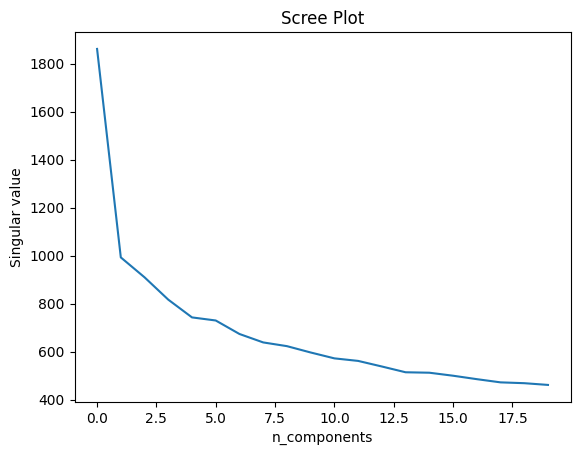

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=20)
svd.fit(Recommendation_train)
plt.plot(svd.singular_values_)
plt.xlabel('n_components')
plt.ylabel('Singular value')
plt.title('Scree Plot')
plt.show()

In [ ]:
import numpy as np
household_key = 1366
predicted_quantities_household = np.dot(svd.transform(Recommendation_train_reconstructed[household_key:household_key+1]), svd.components_)
recommended_product_indices = np.argsort(predicted_quantities_household[0])[::-1]
top_n = 10
recommended_product_indices = recommended_product_indices[:top_n]
predicted_quantities = predicted_quantities_household[0][recommended_product_indices]
recommended_product_ids = recommended_product_indices + 1
recommended_product_desc = product.loc[recommended_product_ids - 1, 'SUB_COMMODITY_DESC'].values
recommendation_df = pd.DataFrame({
    'PRODUCT_ID': recommended_product_ids,
    'SUB_COMMODITY_DESC': recommended_product_desc,
    'PREDICTED_QUANTITY': predicted_quantities
})
recommendation_df

,PRODUCT_ID,SUB_COMMODITY_DESC,PREDICTED_QUANTITY
0,35470,VALUE GLASS WINE,23.931298
1,25685,SPECIALTY CRACKERS,20.784867
2,29568,DRY DOG FOOD PREMIUM (ALPO/PUR,15.468312
3,38144,BEERALEMALT LIQUORS,8.772929
4,41045,SECURITY & SAFETY,8.634258
5,24183,LUNCH COMBO,8.252767
6,13118,SOFT DRINKS 20PK&24PK CAN CARB,6.709147
7,15968,VIENNA SAUSAGE,6.398007
8,10602,VITAMIN - INDIVIDUAL,6.161278
9,40473,CRACKERS,5.774544


In [ ]:
household_key = 1366
user_data = user_product_matrix.iloc[household_key]
purchased_product_indices = np.where(user_data > 0)[0]
purchased_product_ids = purchased_product_indices + 1
purchased_product_desc = product.loc[purchased_product_ids - 1, 'SUB_COMMODITY_DESC'].values
purchased_df = pd.DataFrame({
    'PRODUCT_ID': purchased_product_ids,
    'SUB_COMMODITY_DESC': purchased_product_desc
})
print(purchased_df.head(50))

    PRODUCT_ID              SUB_COMMODITY_DESC
0          112  MAINSTREAM WHEAT/MULTIGRAIN BR
1         1377                    TOMATO SAUCE
2         1439  DAIRY CASE CITRUS PNCH/OJ SUBS
3         1663  FRZN SS PREMIUM ENTREES/DNRS/N
4         1683  APPLES GOLD DELICIOUS (BULK&BA
5         1887  SS ECONOMY ENTREES/DINNERS ALL
6         1970                          BLENDS
7         1990          FRZN MEAT ALTERNATIVES
8         2842                             DRY
9         3024     FLOUR: MISC SPECIALTY BLEND
10        3047              REFRIGERATED PASTA
11        3794          CHICKEN BREAST BONE IN
12        5845        DOG TREATS (SOFT TREATS)
13        5887          MOPS: SPONGE DECK DUST
14        5902                            TAPE
15        5924          CRAFTS/SEWING-MAGAZINE
16        5984       HAIR COLOR AND DEVELOPERS
17        6018             COOKIES/SWEET GOODS
18        6049         ONIONS SWEET (BULK&BAG)
19        6089         MUFFIN & CORN BREAD MIX
20        610